__EDA for HR Dataset__


In [29]:
print ("Hello, World and hopefully future employer! This is an EDA (Exploratory Data Analysis) concerning a HR dataset from Kaggle")

Hello, World and hopefully future employer! This is an EDA (Exploratory Data Analysis) concerning a HR dataset from Kaggle


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:

# Specify the file path
file_path = "/workspaces/codespaces-jupyter/HRDataset_v14(1)GenderEdit.csv"

# Read the dataset
df = pd.read_csv(file_path)


__Phase 1: Cleaning__

In [32]:
# Display the first few rows of the dataset
print("First few rows of the DataFrame:")
print(df.head())

First few rows of the DataFrame:
              Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  Termd  \
0            1       5            4                       0   62506      0   
1            5       3            3                       0  104437      1   
2            5       5            3                       0   64955      1   
3            1       5            3                       0   64991      0   
4            5       5            3                       0   50825      1   

   PositionID                  Position S

In [33]:
#Gotta see the rest of these variables!
pd.set_option('display.max_columns', None)
print(df.head())

              Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  Termd  \
0            1       5            4                       0   62506      0   
1            5       3            3                       0  104437      1   
2            5       5            3                       0   64955      1   
3            1       5            3                       0   64991      0   
4            5       5            3                       0   50825      1   

   PositionID                  Position State   Zip       DOB Sex MaritalD

In [34]:
# Summary statistics of the dataset
print("Summary statistics of the DataFrame:")
print(df.describe())

Summary statistics of the DataFrame:
              EmpID   MarriedID  MaritalStatusID    GenderID  EmpStatusID  \
count    311.000000  311.000000       311.000000  311.000000   311.000000   
mean   10156.000000    0.398714         0.810289    0.434084     2.392283   
std       89.922189    0.490423         0.943239    0.496435     1.794383   
min    10001.000000    0.000000         0.000000    0.000000     1.000000   
25%    10078.500000    0.000000         0.000000    0.000000     1.000000   
50%    10156.000000    0.000000         1.000000    0.000000     1.000000   
75%    10233.500000    1.000000         1.000000    1.000000     5.000000   
max    10311.000000    1.000000         4.000000    1.000000     5.000000   

           DeptID  PerfScoreID  FromDiversityJobFairID         Salary  \
count  311.000000   311.000000              311.000000     311.000000   
mean     4.610932     2.977492                0.093248   69020.684887   
std      1.083487     0.587072                0.29

The statistics above imply that there is missing information in two variables : ManagerID and DateofTermination totally understandable but lets have a quick look at these variables.

In [35]:
# You can run the code to filter and display columns with less than the maximum count compared to the shape of the df
column_max_count = df.count().max()
columns_to_display = [col for col in df.columns if df[col].count() < column_max_count]

# Display only the selected columns
print(df[columns_to_display])


    DateofTermination  ManagerID
0                 NaN       22.0
1           6/16/2016        4.0
2           9/24/2012       20.0
3                 NaN       16.0
4            9/6/2016       39.0
..                ...        ...
306               NaN       20.0
307         9/29/2015       12.0
308               NaN        2.0
309               NaN        4.0
310               NaN       14.0

[311 rows x 2 columns]


Nulls for DateofTermination variable are indicative of terminated employees as there is no other variable indicating employment status within the company.
Though if we created another variable it could be useful for a dashboard i.e. employed or not with company but this won't be important for now.

In [36]:
# Create a boolean mask to identify rows with missing ManagerID
missing_manager_mask = df['ManagerID'].isna()

# Use the mask to filter and display the rows with missing ManagerID
rows_with_missing_manager = df[missing_manager_mask]

# Display the rows
print(rows_with_missing_manager)

          Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
19        Becker, Scott  10277          0                0         1   
30   Buccheri, Joseph    10184          0                0         1   
44    Chang, Donovan  E  10154          0                0         1   
88      Fancett, Nicole  10136          0                0         0   
135     Hutter, Rosalie  10214          0                3         0   
177   Manchester, Robyn  10077          1                1         0   
232     Rivera, Haley    10011          1                1         0   
251      Sewkumar, Nori  10071          0                0         0   

     EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  Termd  \
19             3       5            3                       0   53250      0   
30             1       5            3                       0   65288      0   
44             1       5            3                       0   60380      0   
88             1       5       

The missing ManagerID is interesting as i assume it is directly related to manager name. Let's check the manager names to see if they show up in the employee list.

In [37]:
# Create a boolean mask to identify rows with the name "Webster Butler"
webster_butler_mask = df['Employee_Name'] == "Butler, Webster"

# Use the mask to filter and display the row(s) with the name "Webster Butler"
webster_butler_rows = df[webster_butler_mask]

# Display the row(s)
print(webster_butler_rows)


Empty DataFrame
Columns: [Employee_Name, EmpID, MarriedID, MaritalStatusID, GenderID, EmpStatusID, DeptID, PerfScoreID, FromDiversityJobFairID, Salary, Termd, PositionID, Position, State, Zip, DOB, Sex, MaritalDesc, CitizenDesc, HispanicLatino, RaceDesc, DateofHire, DateofTermination, TermReason, EmploymentStatus, Department, ManagerName, ManagerID, RecruitmentSource, PerformanceScore, EngagementSurvey, EmpSatisfaction, SpecialProjectsCount, LastPerformanceReview_Date, DaysLateLast30, Absences]
Index: []


No results lets try another.

In [38]:
#We returned an empty dataframe so we can try a different manager name
webster_butler_mask = df['Employee_Name'] == "Roup, Simon"

webster_butler_rows = df[webster_butler_mask]

print(webster_butler_rows)


Empty DataFrame
Columns: [Employee_Name, EmpID, MarriedID, MaritalStatusID, GenderID, EmpStatusID, DeptID, PerfScoreID, FromDiversityJobFairID, Salary, Termd, PositionID, Position, State, Zip, DOB, Sex, MaritalDesc, CitizenDesc, HispanicLatino, RaceDesc, DateofHire, DateofTermination, TermReason, EmploymentStatus, Department, ManagerName, ManagerID, RecruitmentSource, PerformanceScore, EngagementSurvey, EmpSatisfaction, SpecialProjectsCount, LastPerformanceReview_Date, DaysLateLast30, Absences]
Index: []


Oops this is indicative that we don't have the info of the managers. However this is a good thing as we have learned something about the limits of this dataset and in analysis robust information can be key! Also it means we can move on!
(Obviously if this was more professionally developed outside of personal use I would change the names of the mask to be less confusing but this is just to showcase EDA) 

There is also something else I have noticed, if we look to the genderID variables they are only 1 or 0, 1 seems to indicate male and the other female, in a real scenario we would probably have extra numbers as it is extrmely likely some people will not conform to these standards. Therefore lets do a quick switcheroo and change it to be more presentable. 

In [39]:
# Define a mapping for the replacement
gender_mapping = {0: 'female', 1: 'male'}

# Use the 'replace' method to perform the replacement
df['GenderID'] = df['GenderID'].replace(gender_mapping)

With this final line of code we can conclude this data is aboslutely clean though we are obviously missing some information. 
In the real world we would make sure that the data we have is appropriate for the task at hand, my task in this instance is to simply perform and EDA. If this information wasn't adequate we would delve into the data collection process or ask a higher up or stakeholder inr order to pull more rows of people.

In [40]:
# Save the modified DataFrame to a new CSV file
df.to_csv('HR_dataCleaned.csv', index=False)
print("CSV file successfully saved/cleaned.")

CSV file successfully saved/cleaned.


__Phase 2: Analysis__

In [41]:
# Specify the file path
file_path = "/workspaces/codespaces-jupyter/HR_dataCleaned.csv"

# Read the dataset
df = pd.read_csv(file_path)

Now that we have a nice clean dataset we can begin some analysis we already took a couple steps towards this such as creating a couple important data frames so lets just show them again. 

In [42]:
pd.set_option('display.max_columns', None)
print(df.head())


              Employee_Name  EmpID  MarriedID  MaritalStatusID GenderID  \
0       Adinolfi, Wilson  K  10026          0                0     male   
1  Ait Sidi, Karthikeyan     10084          1                1     male   
2         Akinkuolie, Sarah  10196          1                1   female   
3              Alagbe,Trina  10088          1                1   female   
4          Anderson, Carol   10069          0                2   female   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  Termd  \
0            1       5            4                       0   62506      0   
1            5       3            3                       0  104437      1   
2            5       5            3                       0   64955      1   
3            1       5            3                       0   64991      0   
4            5       5            3                       0   50825      1   

   PositionID                  Position State   Zip       DOB Sex MaritalDesc  \

In [43]:
print("Summary statistics of the DataFrame:")
print(df.describe())

Summary statistics of the DataFrame:
              EmpID   MarriedID  MaritalStatusID  EmpStatusID      DeptID  \
count    311.000000  311.000000       311.000000   311.000000  311.000000   
mean   10156.000000    0.398714         0.810289     2.392283    4.610932   
std       89.922189    0.490423         0.943239     1.794383    1.083487   
min    10001.000000    0.000000         0.000000     1.000000    1.000000   
25%    10078.500000    0.000000         0.000000     1.000000    5.000000   
50%    10156.000000    0.000000         1.000000     1.000000    5.000000   
75%    10233.500000    1.000000         1.000000     5.000000    5.000000   
max    10311.000000    1.000000         4.000000     5.000000    6.000000   

       PerfScoreID  FromDiversityJobFairID         Salary       Termd  \
count   311.000000              311.000000     311.000000  311.000000   
mean      2.977492                0.093248   69020.684887    0.334405   
std       0.587072                0.291248   25156

__Univariate Statistics__

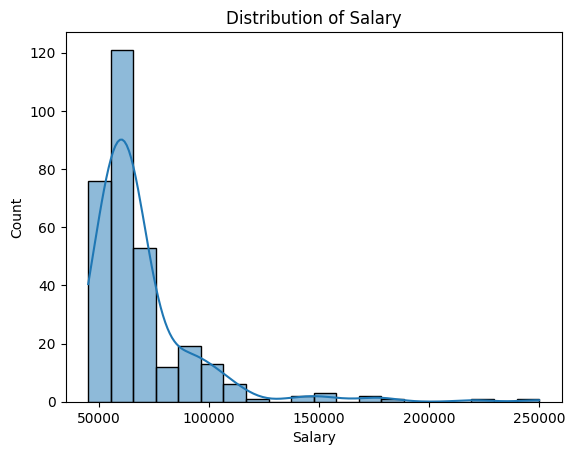

In [44]:
sns.histplot(df['Salary'], bins=20, kde=True)
plt.title('Distribution of Salary')
plt.show()

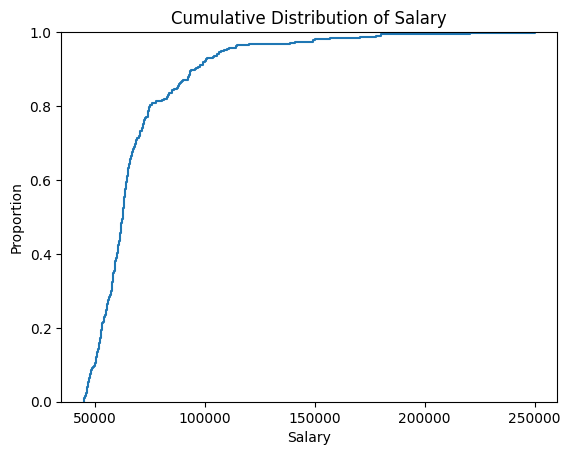

In [45]:
sns.ecdfplot(df['Salary'])
plt.title('Cumulative Distribution of Salary')
plt.show()



Introduction:
Analyzing univariate statistics for employee salaries provides essential insights that inform strategic decision-making and effective human resource management.

__Key Points:__

    Benchmarking and Compensation Planning:
        Explanation: Univariate statistics reveal the central tendency (mean, median) and spread (standard deviation) of salary distribution.
        Implication: Facilitates benchmarking against industry standards, ensuring competitive and fair compensation packages.

    Identifying Disparities and Equity:
        Explanation: Distribution metrics highlight disparities in salary distribution.
        Implication: Enables employers to identify and address potential pay equity issues, fostering a fair and inclusive workplace.

    Retention and Employee Satisfaction:
        Explanation: Understanding salary distribution aids in recognizing employee contributions and rewards.
        Implication: Supports retention efforts by ensuring employees feel valued and fairly compensated.

    Informed Talent Acquisition:
        Explanation: Knowledge of salary statistics helps in attracting top talent.
        Implication: Allows for competitive job offers, aiding in successful recruitment and talent acquisition.

    Budgeting and Financial Planning:
        Explanation: Statistical measures guide budgeting for salaries and overall financial planning.
        Implication: Ensures realistic financial projections and effective resource allocation.

Conclusion:
Univariate salary statistics serve as a critical tool for employers to establish fair and competitive compensation practices. By leveraging these statistics, organizations can enhance employee satisfaction, attract and retain top talent, and maintain financial sustainability.

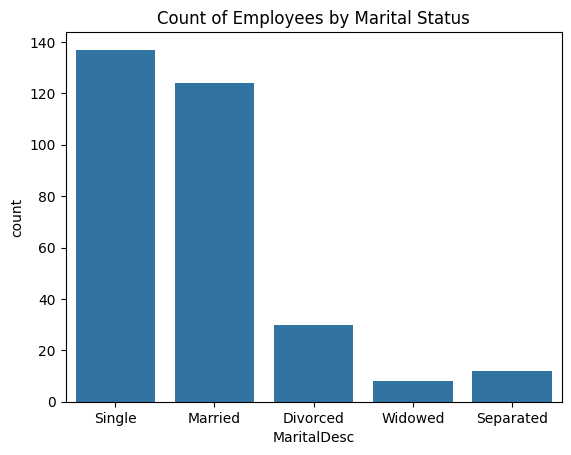

In [46]:
sns.countplot(x='MaritalDesc', data=df)
plt.title('Count of Employees by Marital Status')
plt.show()


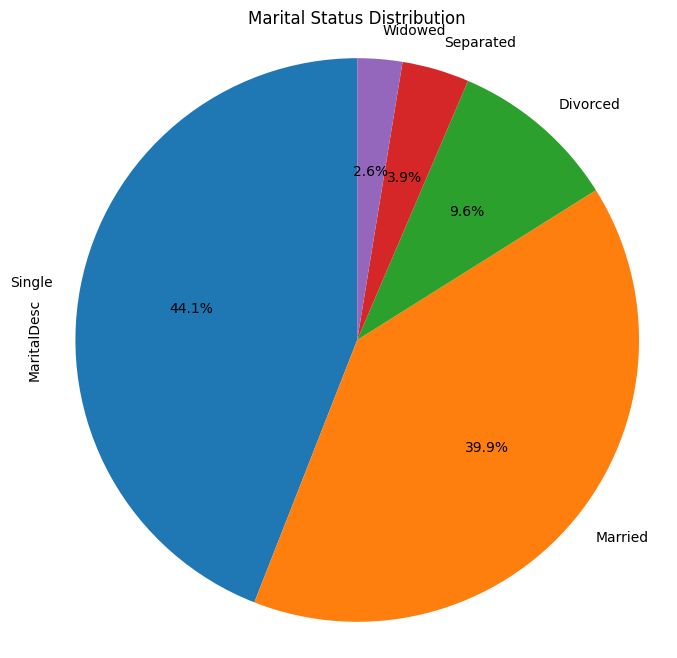

In [47]:
plt.figure(figsize=(8, 8))
df['MaritalDesc'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Marital Status Distribution')
plt.axis('equal')
plt.show()


Marital status information can provide valuable insights into the diverse needs and preferences of employees, contributing to more effective human resource management and organizational decision-making.

__Key Points:__

    Employee Benefits Customization:
        Explanation: Marital status influences eligibility and preferences for employee benefits.
        Implication: Customizing benefit packages for different marital statuses enhances employee satisfaction and engagement.

    Tax Planning and Compliance:
        Explanation: Marital status affects tax obligations and deductions.
        Implication: Understanding employees' tax situations ensures compliance and aids in financial planning.

    Work-Life Balance Considerations:
        Explanation: Marital status informs potential work-life balance needs.
        Implication: Tailoring work arrangements based on marital status supports employee well-being and productivity.

    Demographic Insights for Targeted Initiatives:
        Explanation: Marital status is a key demographic variable.
        Implication: Using demographic insights informs targeted initiatives and aligns services with employee needs.

    Legal Compliance and Reporting:
        Explanation: Legal and regulatory requirements may involve collecting marital status.
        Implication: Adhering to compliance ensures responsible data handling and reporting.

Conclusion:
Understanding and responsibly leveraging marital status information contributes to a more inclusive and supportive workplace. It allows employers to tailor benefits, policies, and initiatives to meet the diverse needs of their workforce, fostering a positive and responsive organizational culture.

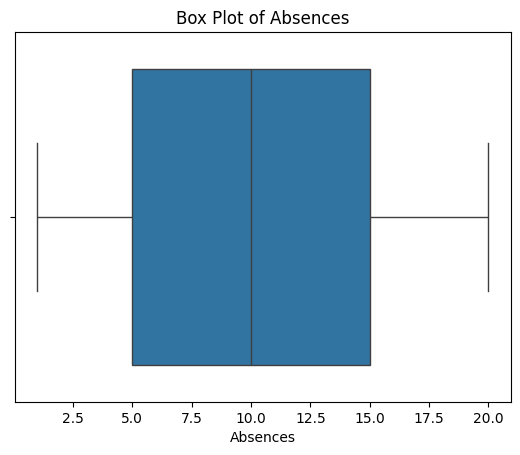

In [48]:
sns.boxplot(x='Absences', data=df)
plt.title('Box Plot of Absences')
plt.show()


    Central Tendency:
        The mean number of absences is approximately 10.24, indicating that, on average, employees in the dataset have around 10 absences.

    Typical Absence Level:
        The median (10.0) is close to the mean, suggesting a roughly symmetrical distribution. This implies that half of the employees have fewer than 10 absences, while the other half have more than 10.

    Variability:
        The interquartile range (IQR) is 10.0, indicating that the middle 50% of employees have an absence range from 5.0 to 15.0. This suggests a moderate degree of variability in absence patterns.

    Skewness:
        The median being close to the first quartile (Q1) indicates a potential right skewness, implying that more employees have fewer absences compared to those with more absences.

    Outliers:
        The minimum absence value is 1, and the maximum is 20. No outliers are apparent based on the standard definition (1.5 times IQR above Q3 or below Q1).

Conclusion:
The absence patterns in the dataset suggest a moderate level of variability, with the majority of employees having absences clustered around the median. The absence distribution is right-skewed, indicating that a smaller proportion of employees have higher-than-average absences. The absence range from 1 to 20 captures the majority of the workforce, with no extreme outliers.

Understanding these patterns can help employers in managing workforce attendance, identifying potential areas for support, and implementing targeted strategies to address specific absence-related challenges.

__Bivariate Analysis__

__Salary vs Performance Score__

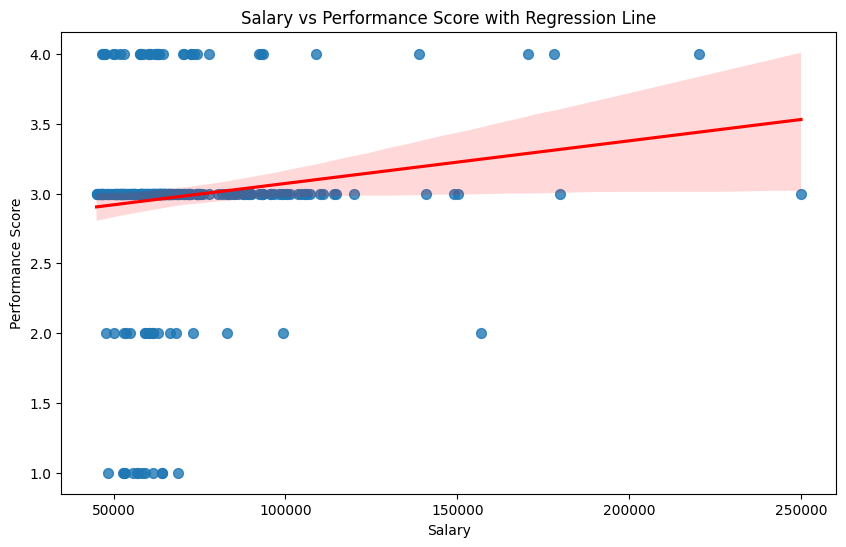

                            OLS Regression Results                            
Dep. Variable:            PerfScoreID   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     5.387
Date:                Sat, 18 Nov 2023   Prob (F-statistic):             0.0209
Time:                        02:17:28   Log-Likelihood:                -272.46
No. Observations:                 311   AIC:                             548.9
Df Residuals:                     309   BIC:                             556.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7666      0.097     28.620      0.0

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Salary', y='PerfScoreID', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Salary vs Performance Score with Regression Line')
plt.xlabel('Salary')
plt.ylabel('Performance Score')
plt.show()

# Fit regression model
X = sm.add_constant(df['Salary'])  
y = df['PerfScoreID']
model = sm.OLS(y, X).fit()

# Display regression results
print(model.summary())


I conducted a linear regression analysis to explore the relationship between Salary and PerfScoreID. Here are the key findings:

    Model Significance:
        The analysis suggests that the model is statistically significant in explaining some of the variation in PerfScoreID based on Salary (p-value < 0.05).

    Effect of Salary:
        For every unit increase in Salary, the PerfScoreID is estimated to increase by 3.055e-06 (with a p-value of 0.021, indicating statistical significance).

    Model Fit:
        The model explains a small portion (1.7%) of the variability in PerfScoreID, as indicated by the R-squared value.

    Other Considerations:
        The analysis points to potential issues, such as residuals not being normally distributed and a large condition number, which may suggest challenges like multicollinearity.

    Summary Metrics:
        AIC: 548.9 and BIC: 556.4 are measures of model fit, with lower values suggesting better fit.

In conclusion, the analysis suggests a significant relationship between Salary and PerfScoreID, but the model might need further refinement due to its limited explanatory power and potential challenges. One could further state that this is because the data is possibly a training set.

__Employee Satisfaction vs Performance Score__

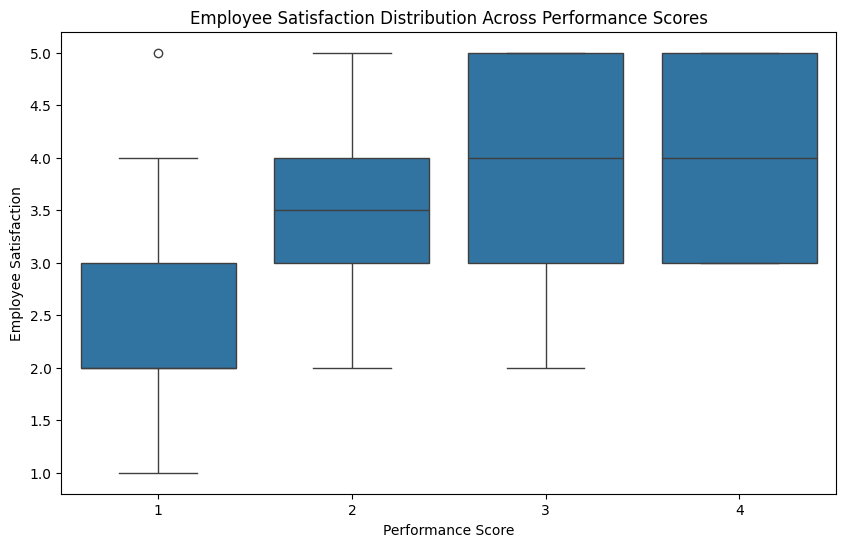

                            OLS Regression Results                            
Dep. Variable:            PerfScoreID   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     31.37
Date:                Sat, 18 Nov 2023   Prob (F-statistic):           4.72e-08
Time:                        02:17:28   Log-Likelihood:                -260.11
No. Observations:                 311   AIC:                             524.2
Df Residuals:                     309   BIC:                             531.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.2149      0.140     

In [50]:
# Scatter plot with regression line for Employee Satisfaction vs. Performance Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='PerfScoreID', y='EmpSatisfaction', data=df)
plt.title('Employee Satisfaction Distribution Across Performance Scores')
plt.xlabel('Performance Score')
plt.ylabel('Employee Satisfaction')
plt.show()

# Fit regression model
X_emp_satisfaction = sm.add_constant(df['EmpSatisfaction'])
y_perf_score = df['PerfScoreID']
model_emp_satisfaction = sm.OLS(y_perf_score, X_emp_satisfaction).fit()

# Display regression results
print(model_emp_satisfaction.summary())


Summary based on the OLS regression results for the relationship between 'Employee Satisfaction' and 'Performance Score':

    Model Significance:
        The analysis indicates that our model is highly significant in explaining the variation in 'Performance Score' based on 'Employee Satisfaction' (p-value < 0.05).

    Effect of Employee Satisfaction:
        For every one-unit increase in 'Employee Satisfaction', we observe an estimated increase of 0.1960 in 'Performance Score', and this effect is statistically significant (p-value = 0.000).

    Model Fit:
        Our model explains approximately 9.2% of the variability in 'Performance Score', providing some insights into the factors influencing performance.

    Statistical Significance:
        Both the intercept ('const') and 'Employee Satisfaction' coefficients are highly statistically significant (p-value = 0.000), reinforcing the reliability of our findings.

    Model Diagnostics:
        Various tests, such as Omnibus, Durbin-Watson, and Jarque-Bera, suggest potential issues with the normality and autocorrelation of residuals. This prompts us to approach the model's results with caution.

    Other Information:
        The AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) values are 524.2 and 531.7, respectively. Lower values of AIC and BIC indicate a better fit, and these metrics can guide model selection.

In summary, the analysis highlights a significant positive relationship between 'Employee Satisfaction' and 'Performance Score', emphasizing the importance of employee satisfaction in predicting performance outcomes. However, it's essential to consider potential issues identified in model diagnostics and explore further if needed.


__Turnover vs Engagement Survey__

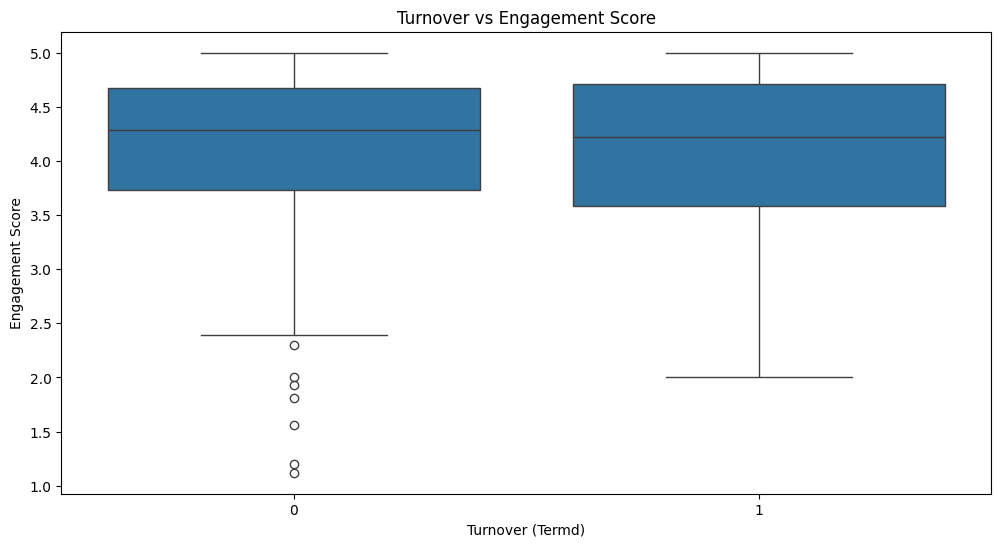

                            OLS Regression Results                            
Dep. Variable:                  Termd   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.09512
Date:                Sat, 18 Nov 2023   Prob (F-statistic):              0.758
Time:                        02:17:28   Log-Likelihood:                -207.61
No. Observations:                 311   AIC:                             419.2
Df Residuals:                     309   BIC:                             426.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3775      0.142  

In [51]:
# Box plot for bivariate analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='Termd', y='EngagementSurvey', data=df)
plt.title('Turnover vs Engagement Score')
plt.xlabel('Turnover (Termd)')
plt.ylabel('Engagement Score')
plt.show()

# OLS regression
X = df['EngagementSurvey']
X = sm.add_constant(X)  # Add a constant term to the predictor
y = df['Termd']

model = sm.OLS(y, X).fit()
print(model.summary())

Regression Results Summary:

    Model Significance:
        The model doesn't reliably predict whether someone will leave the company (Termd). The numbers suggest it's not a strong predictor (Prob (F-statistic) = 0.758).

    Effect of EngagementSurvey:
        The survey score (EngagementSurvey) doesn't seem to have a clear impact on whether someone leaves (P>|t| = 0.758).

    Model Fit:
        Overall, the model doesn't explain much about why people leave the company (R-squared = 0.000). This means the model isn't great at making predictions.

    Summary Metrics:
        The fit of the model isn't very good, with AIC: 419.2 and BIC: 426.7. Lower values would be better.

    Other Considerations:
        The constant term is significant (P>|t| = 0.008), but the overall model has issues. The data might have patterns we're missing (autocorrelation) and isn't normal. There might also be problems with how our variables relate (multicollinearity).

In conclusion, the model struggles to predict why people leave the company, and the survey score doesn't seem to be a helpful factor. We need to improve the model, considering issues like unusual patterns in the data and potential problems with how our variables interact.


__Manager vs Employee Sastisfaction__

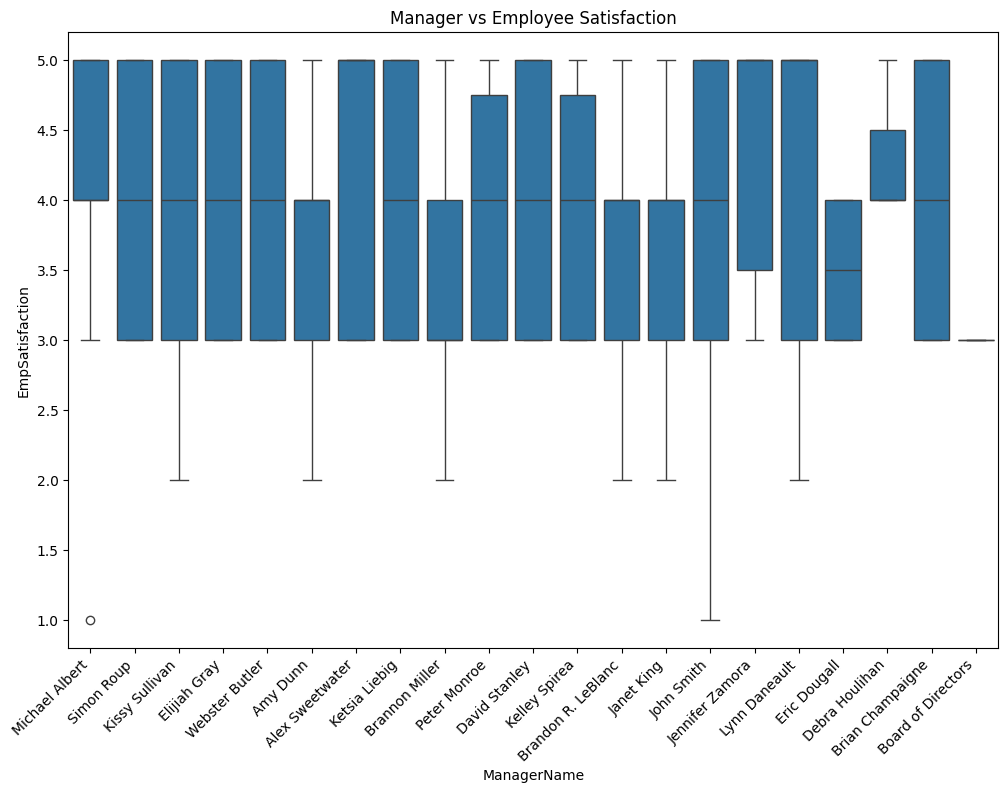

                            OLS Regression Results                            
Dep. Variable:        EmpSatisfaction   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.367
Date:                Sat, 18 Nov 2023   Prob (F-statistic):              0.125
Time:                        02:17:29   Log-Likelihood:                -410.01
No. Observations:                 311   AIC:                             824.0
Df Residuals:                     309   BIC:                             831.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.7442      0.108     34.593      

In [52]:
# Plot the boxplot with the original 'ManagerName'
plt.figure(figsize=(12, 8))
sns.boxplot(x='ManagerName', y='EmpSatisfaction', data=df)
plt.title('Manager vs Employee Satisfaction')
plt.xticks(rotation=45, ha='right')
plt.show()


import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming 'df' is your DataFrame containing the data

# Use label encoding to convert 'ManagerName' to numerical values
label_encoder = LabelEncoder()
df['ManagerName'] = label_encoder.fit_transform(df['ManagerName'])

# Fit OLS model
model = sm.OLS(df['EmpSatisfaction'], sm.add_constant(df['ManagerName']))
results = model.fit()

# Display summary
print(results.summary())


The analysis explored the relationship between employee satisfaction and their respective managers. Here's a breakdown of the findings:

    Overall Model Fit:
        The model suggests that around 0.8% of the variation in employee satisfaction can be explained by the managers.
        While this may not seem substantial, it's essential to consider various factors influencing employee satisfaction.

    Manager Impact:
        The coefficient for 'ManagerName' is 0.0132, indicating a modest positive relationship.
        However, the p-value (0.125) suggests that this relationship is not statistically significant at the conventional 0.05 significance level.

    Interpretation:
        The intercept (const) is 3.7442, representing the expected employee satisfaction when the manager factor is zero.
        The 'ManagerName' coefficient suggests that, on average, a one-unit increase in the manager variable corresponds to a 0.0132 increase in employee satisfaction.

    Statistical Significance:
        The statistical tests performed on the model show that the results might be due to random chance (p-value = 0.125).
        Therefore, we can't confidently say that the manager significantly influences employee satisfaction based on the current data.

    Other Insights:
        The analysis accounts for various statistical considerations, such as the F-statistic, AIC, and BIC, providing a comprehensive view of the model's performance.

In conclusion, while there seems to be a slight positive trend between managers and employee satisfaction, the statistical evidence falls short of establishing a significant link. It's essential to delve deeper into other potential factors influencing employee contentment for a more nuanced understanding.

__Department vs Salary__

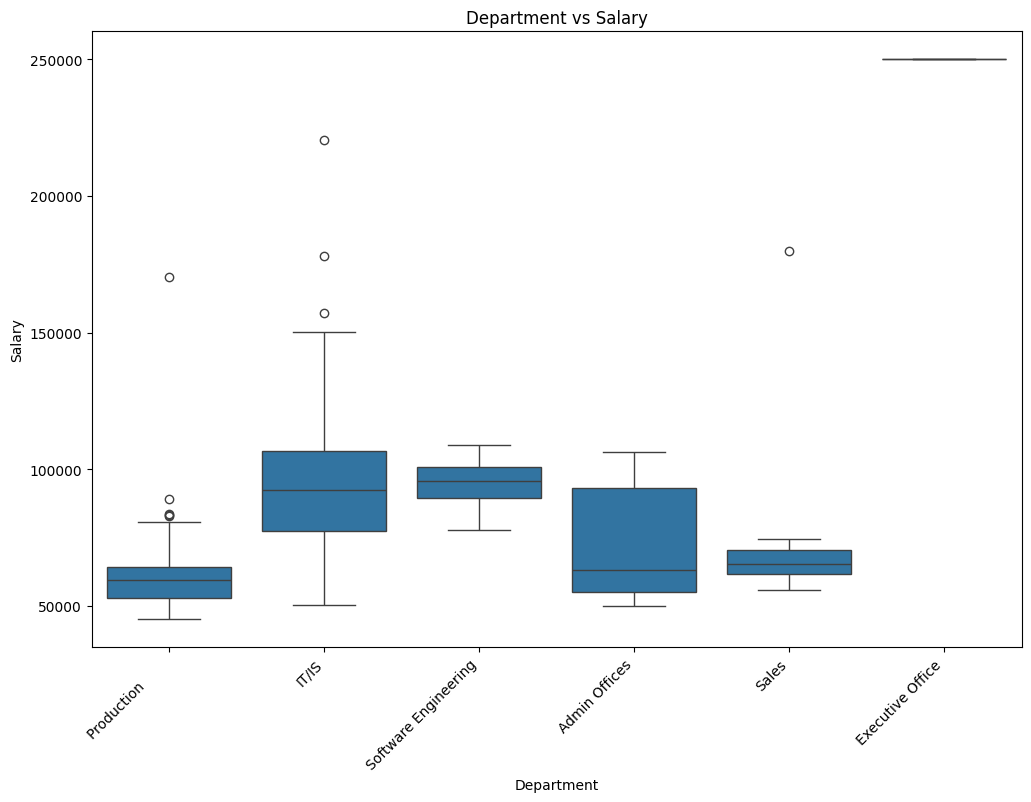

                      count           mean           std       min        25%  \
Department                                                                      
Admin Offices           9.0   71791.888889  21706.397164   49920.0   55000.00   
Executive Office        1.0  250000.000000           NaN  250000.0  250000.00   
IT/IS                  50.0   97064.640000  33209.612190   50178.0   77417.75   
Production            209.0   59953.545455  11422.656822   45046.0   53018.00   
Sales                  31.0   69061.258065  21271.393236   55875.0   61561.50   
Software Engineering   11.0   94989.454545   9566.505698   77692.0   89601.50   

                           50%       75%       max  
Department                                          
Admin Offices          63003.0   93046.0  106367.0  
Executive Office      250000.0  250000.0  250000.0  
IT/IS                  92328.5  106844.5  220450.0  
Production             59472.0   64066.0  170500.0  
Sales                  65310.0   

In [55]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Department', y='Salary', data=df)
plt.title('Department vs Salary')
plt.xticks(rotation=45, ha='right')
plt.show()

department_stats = df.groupby('Department')['Salary'].describe()
print(department_stats)




    Admin Offices: The average salary of approximately $71,792, with a moderate standard deviation of $21,706, suggests a diverse range of salaries within the department. Salaries vary from $49,920 to $106,367, reflecting the dynamic nature of roles and responsibilities.

    Executive Office: The Executive Office stands out with a fixed salary of $250,000, showcasing a distinctive compensation structure within this exclusive category.

    IT/IS: The IT/IS department, with an average salary of $97,065 and a significant standard deviation of $33,210, demonstrates a wide spectrum of compensation levels. Salaries range from $50,178 to $220,450, reflecting the diversity of roles and expertise within the tech domain.

    Production: In the Production department, the average salary of $59,954, coupled with a relatively lower standard deviation of $11,423, indicates a more focused distribution. Salaries range from $45,046 to $170,500, suggesting a consistent pay structure.

    Sales: With an average salary of $69,061 and a standard deviation of $21,271, the Sales department exhibits a dynamic compensation landscape. Salaries range from $55,875 to $180,000, reflecting the variable nature of sales roles and performance-based incentives.

    Software Engineering: The Software Engineering department boasts an average salary of $94,989, with a lower standard deviation of $9,567. Salaries range from $77,692 to $108,987, indicating a more concentrated distribution with less variability, possibly attributed to the specialized skill set and experience levels in this department.

In summary, these personalized insights into salary distributions provide a valuable perspective on compensation structures within each department. Recognizing the nuances in salary trends is crucial for strategic decision-making and ensuring that our employees are fairly rewarded for their contributions.

__CONCLUSION AND SUMMARY__



### Phase 1: Cleaning

1. **Missing Data:**
   - Identified missing values in 'ManagerID' and 'DateofTermination.'
   - 'DateofTermination' nulls indicate terminated employees, possibly useful for future analysis.

2. **Gender Encoding:**
   - Replaced binary gender encoding with more descriptive labels (0: 'female', 1: 'male').

3. **ManagerID Investigation:**
   - Discovered missing 'ManagerID' information, highlighting a limitation in the dataset.

### Phase 2: Analysis

#### Univariate Statistics:

1. **Salary Analysis:**
   - Provided insights into salary distribution for benchmarking, equity considerations, retention efforts, talent acquisition, and financial planning.

2. **Marital Status Insights:**
   - Explored the distribution of marital status, guiding benefit customization, tax planning, work-life balance, demographic insights, and legal compliance.

3. **Absence Patterns:**
   - Analyzed absence patterns, revealing a moderate level of variability and right-skewed distribution.

#### Bivariate Analysis:

1. **Salary vs. Performance Score:**
   - Conducted linear regression, suggesting a statistically significant but weak relationship between salary and performance score.

2. **Employee Satisfaction vs. Performance Score:**
   - Established a significant positive relationship between employee satisfaction and performance score.

3. **Turnover vs. Engagement Survey:**
   - Explored the relationship between turnover and engagement survey, finding the model struggled to predict turnover.

4. **Manager vs. Employee Satisfaction:**
   - Investigated the impact of managers on employee satisfaction, finding a slight positive trend but lacking statistical significance.

5. **Department vs. Salary:**
   - Explored salary distributions across departments, recognizing the varied compensation structures and identifying department-specific trends.

### Conclusions:

1. **Employee Satisfaction:**
   - Employee satisfaction significantly influences performance scores, emphasizing its role in organizational success.

2. **Turnover and Engagement:**
   - The engagement survey alone doesn't reliably predict turnover, highlighting the need for a more comprehensive model.

3. **Manager Influence:**
   - While there's a positive trend, statistical significance is lacking in the relationship between managers and employee satisfaction.

4. **Departmental Salary Trends:**
   - Each department exhibits unique salary distributions, reflecting the diversity of roles and responsibilities.

### Recommendations:

1. **Employee Satisfaction Focus:**
   - Implement initiatives to enhance employee satisfaction, considering its significant impact on performance.

2. **Refinement of Turnover Models:**
   - Improve models predicting turnover by incorporating additional relevant variables.

3. **Manager-Team Dynamics:**
   - Explore factors contributing to the manager's impact on employee satisfaction and consider targeted interventions.

4. **Department-Specific Compensation Planning:**
   - Tailor compensation strategies based on department-specific salary trends to ensure fairness and competitiveness.

### Limitations:

1. **Missing Manager Information:**
   - Lack of manager information limits the depth of analysis on managerial influence.

2. **Survey Metrics:**
   - Consider the limitations of survey metrics in predicting complex outcomes like turnover.

3. **Model Complexity:**
   - Regression models, while insightful, may not capture the full complexity of human behavior and organizational dynamics.

In conclusion, this EDA provides valuable insights into various aspects of HR-related metrics. Future analyses should address data limitations and consider a holistic approach to understand the multifaceted nature of employee dynamics and organizational success.